https://jovian.ai/aakashns/python-sklearn-linear-regression

# **Todos**


Understand Box Plot



**EXERCISE**: Are two separate linear regression models, one for smokers and one of non-smokers, better than a single linear regression model? Why or why not? Try it out and see if you can justify your answer with data.

>* All Data Score: 0.6984461853680766
* Non Smokers Data Score: 0.44382421605893085
* Smokers Data Score: 0.7538812570597254

Higher R² = better fit (but beware of overfitting in some contexts).

* If your goal is accuracy across both groups, the single model is better overall.

* If your goal is interpreting group-specific behavior, then splitting helps, especially for smokers.

**Does columns like sex and smoker shouldn't be normalized?**
Yes, They shouldn't. Don’t normalize binary/categorical features like sex and smoker

 Here are some example of regression problems:

  - [Medical Charges Prediction](https://www.kaggle.com/subhakarks/medical-insurance-cost-analysis-and-prediction)
  - [House Price Prediction](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
  - [Ocean Temperature Prediction](https://www.kaggle.com/sohier/calcofi)
  - [Weather Temperature Prediction](https://www.kaggle.com/budincsevity/szeged-weather)

# **Imports**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.metrics import mean_squared_error, root_mean_squared_error
# import tensorflow as tf

pd.set_option('future.no_silent_downcasting', True)

plt.style.use("Solarize_Light2")

%matplotlib inline

## Problem Statement

> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence.

> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.


> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.


> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets



# **Load Dataset**

In [ ]:
df_orig = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [ ]:
df_orig.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Processing Data**

## info and describe

In [ ]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df_orig.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Check NaNs

In [ ]:
df_orig.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df = df_orig.dropna().copy()

## Numericalize

### Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals


In [ ]:
df["region"] = df["region"].replace({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
df["sex"] = df["sex"].replace({'female': 0, 'male': 1})
df["smoker"] = df["smoker"].replace({'no': 0, 'yes': 1})

# Then explicitly cast
df["region"] = df["region"].astype(np.int8)
df["sex"] = df["sex"].astype(np.int8)
df["smoker"] = df["smoker"].astype(np.int8)

In [ ]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,0,16884.9240
1,18,1,33.77,1,0,1,1725.5523


### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)


In [ ]:
# enc = OneHotEncoder()
# enc.fit(df[['region']])
# enc.categories_

In [ ]:
# one_hot = enc.transform(df[['region']]).toarray()
# one_hot

In [ ]:
# df[enc.categories_[0]] = one_hot.astype(np.int8)

In [ ]:
# df = df.drop(["region"], axis=1)
# df.head()

# **Plotting**


## Histogram and Box plots
**EXERCISE**: Can you explain why there are over twice as many customers with ages 18 and 19, compared to other ages?

**Normal Distribution**: a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. The normal distribution appears as a "bell curve" when graphed.

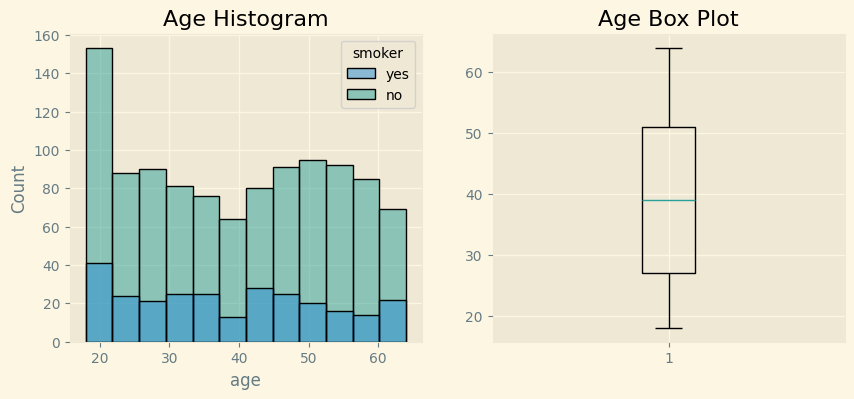

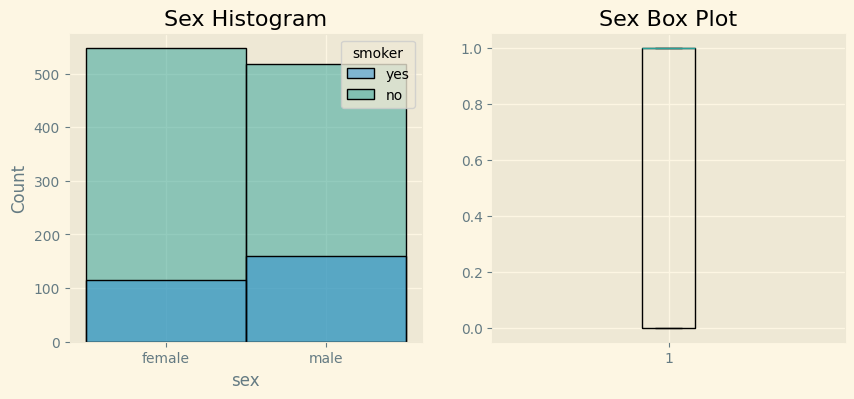

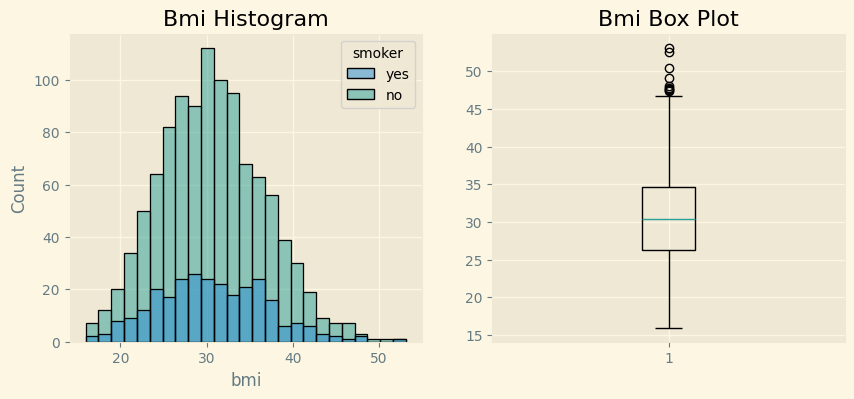

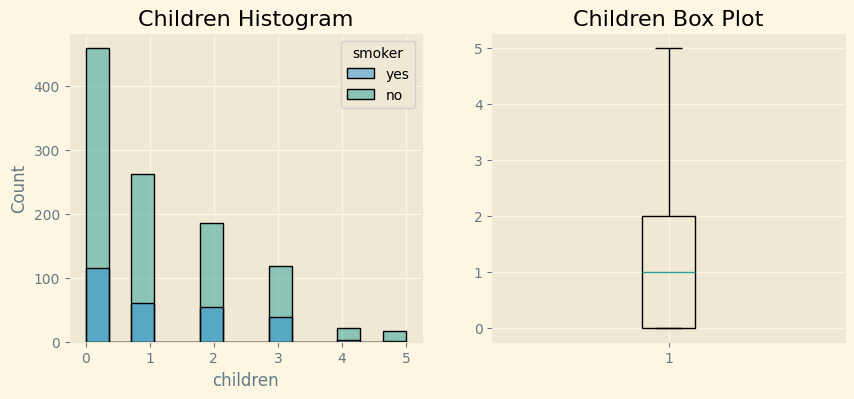

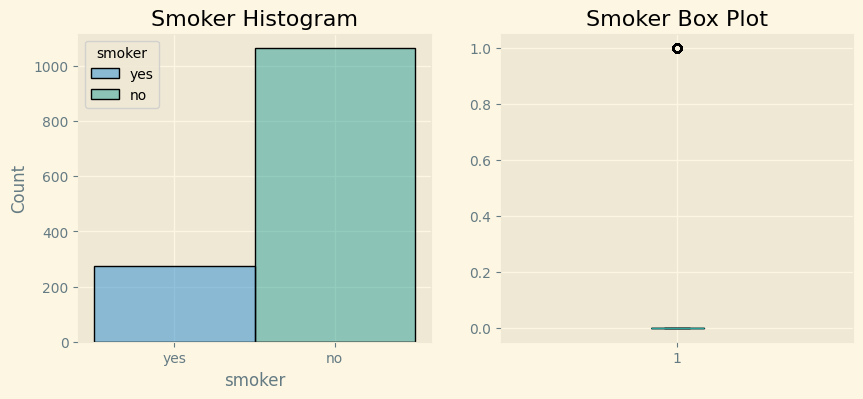

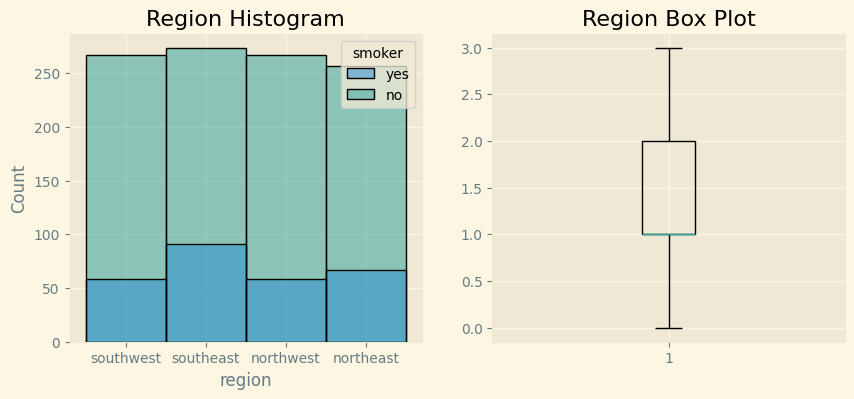

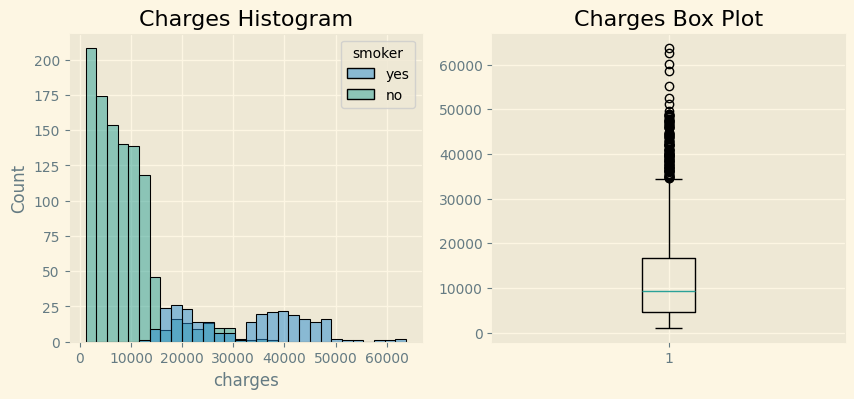

In [ ]:
for col in df.columns:
  fig, axes = plt.subplots(1, 2, figsize=(10, 4))

  sns.histplot(ax=axes[0], data=df_orig, x=col, hue="smoker") # You can do it for age and other columns :)
  axes[0].set_title(f"{col.capitalize()} Histogram")

  axes[1].boxplot(x=df[col])
  axes[1].set_title(f"{col.capitalize()} Box Plot")
  plt.show()

<Axes: xlabel='smoker', ylabel='Count'>

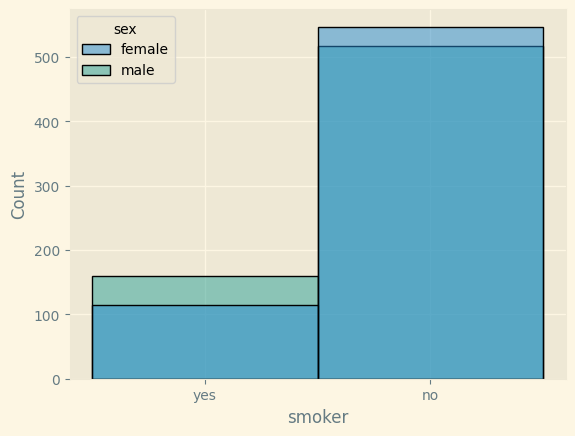

In [ ]:
# ['layer', 'stack', 'fill', 'dodge']
# sns.histplot(data=df_orig, x="smoker", hue="sex",  multiple="stack") # like plotly
# sns.histplot(data=df_orig, x="smoker", hue="sex", multiple="fill") # precentage
sns.histplot(data=df_orig, x="smoker", hue="sex", multiple="layer") # default

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under \$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \$7300, the median for smokers is close to \$35,000.

## Scatter Plot

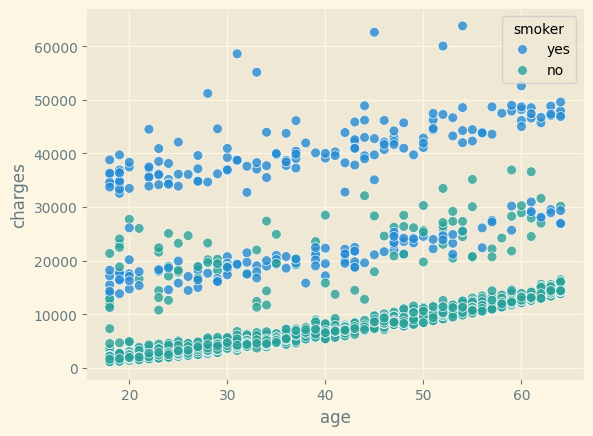

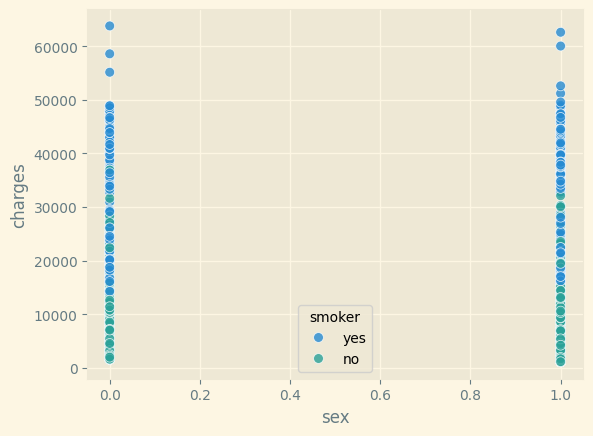

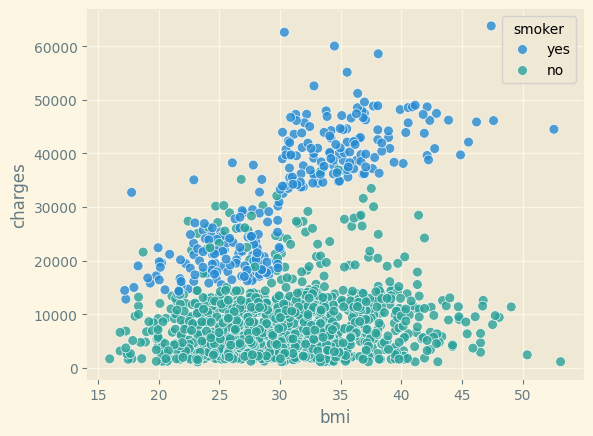

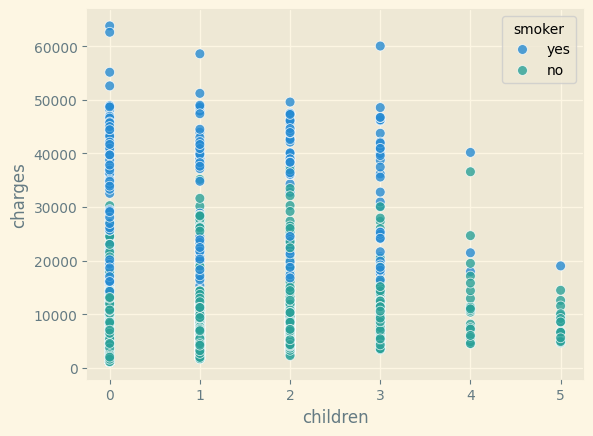

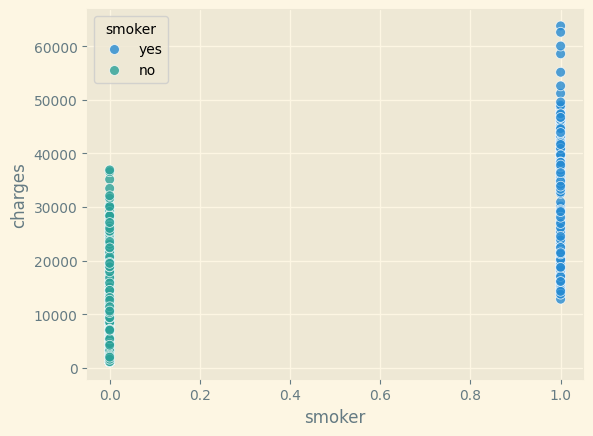

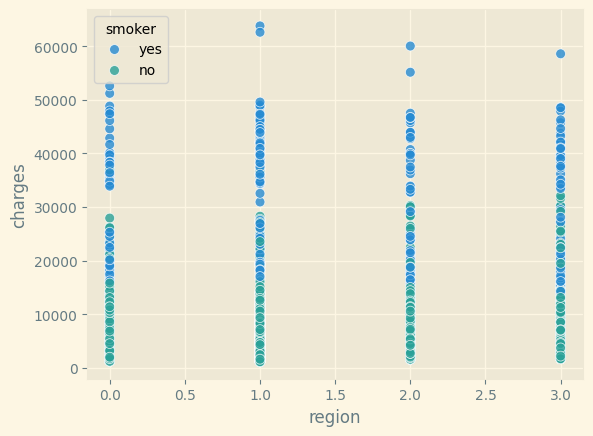

In [ ]:
cols = df.columns
for col in cols[:-1]:
    sns.scatterplot(data=df_orig, x=df[col], y=df[cols[-1]], hue="smoker", s=50, alpha=.8)
    plt.xlabel(col)
    plt.ylabel(cols[-1])
    plt.show()

## Violin Plot

In [ ]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [ ]:
cols = ["children", "region", "charges"]
for col in cols[:-1]:
    plot = px.violin(df, x=df[col], y=df[cols[-1]], template="seaborn")
    plot.show()

# **Correlation and Similarity**

## Correlation
No need for normalization

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [ ]:
cols = df_orig.columns
for i in range(len(cols)-1, -1, -1):
    for j in range(i - 1, -1, -1):
        corr = df[cols[i]].corr(df[cols[j]])
        if corr > 0.1 or corr < -0.1:
          print(f"corr {cols[i]} and {cols[j]} = {df[cols[i]].corr(df[cols[j]])}")

corr charges and smoker = 0.787251430498478
corr charges and bmi = 0.19834096883362895
corr charges and age = 0.2990081933306476
corr region and bmi = -0.15756584854084843
corr bmi and age = 0.10927188154853519





Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

## Correlation Heatmap

In [ ]:
cor_map_all = df.corr()
cor_map_smoker = df[df["smoker"] == 1].corr()
cor_map_non_smoker = df[df["smoker"] == 0].corr()

Text(0.5, 1.0, 'Correlation Matrix All Data')

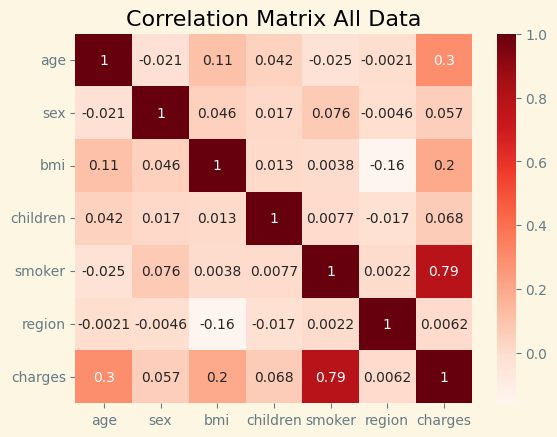

In [ ]:
sns.heatmap(data=cor_map_all, annot=True, cmap="Reds")
plt.title("Correlation Matrix All Data")

Text(0.5, 1.0, 'Correlation Matrix Smokers Data')

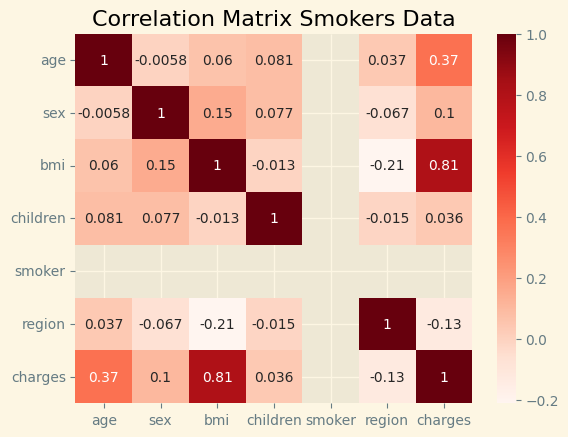

In [ ]:
sns.heatmap(data=cor_map_smoker, annot=True, cmap="Reds")
plt.title("Correlation Matrix Smokers Data")

Text(0.5, 1.0, 'Correlation Matrix Non Smokers Data')

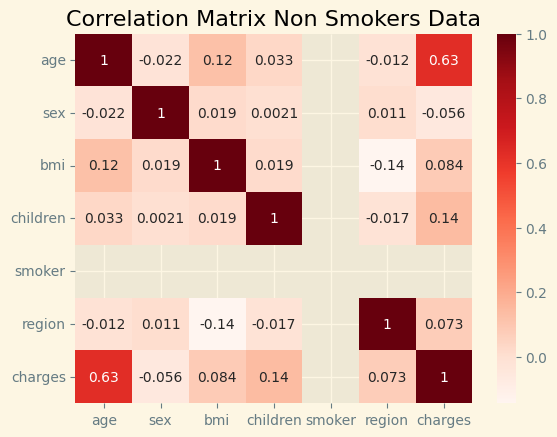

In [ ]:
sns.heatmap(data=cor_map_non_smoker, annot=True, cmap="Reds")
plt.title("Correlation Matrix Non Smokers Data")

**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features $X$ and $Y$ can be correlated if $X$ causes $Y$ or if $Y$ causes $X$, or if both are caused independently by some other factor $Z$, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that $X$ are $Y$ simply appear to be correlated because the sample is too small.

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

# **Split Train and Test**
It's better to do it before normalization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df["charges"], test_size=0.33)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(df.iloc[:, :-1][df["smoker"] == 1].copy(), df_orig[df["smoker"] == 1]["charges"], test_size=0.33)

X_train_non_s, X_test_non_s, y_train_non_s, y_test_non_s = train_test_split(df.iloc[:, :-1][df["smoker"] == 0].copy(), df_orig[df["smoker"] == 0]["charges"], test_size=0.33)

In [ ]:
X_train.head(2)

,age,sex,bmi,children,smoker,region
511,27,1,33.66,0,0,1
238,19,1,29.07,0,1,2


# **Normalization**
don’t normalize binary/categorical features like sex and smoker

In [ ]:
def normalization(model, data: pd.DataFrame):
    # Fit the model and transform the data
    norm = model.transform(data)
    # preserve the original index
    return pd.DataFrame(data=norm, columns=data.columns, index=data.index)

In [ ]:
numeric_cols = ["age", "bmi"]
scalar_model = StandardScaler

scalar = scalar_model().fit(X_train[numeric_cols])
scalar_s = scalar_model().fit(X_train_s[numeric_cols])
scalar_non_s = scalar_model().fit(X_train_non_s[numeric_cols])

In [ ]:
X_train[numeric_cols] = normalization(scalar, X_train[numeric_cols])
X_test[numeric_cols] = normalization(scalar, X_test[numeric_cols])

X_train_s[numeric_cols] = normalization(scalar_s, X_train_s[numeric_cols])
X_test_s[numeric_cols] = normalization(scalar_s, X_test_s[numeric_cols])

X_train_non_s[numeric_cols] = normalization(scalar_non_s, X_train_non_s[numeric_cols])
X_test_non_s[numeric_cols] = normalization(scalar_non_s, X_test_non_s[numeric_cols])

norm_df = df.copy()
norm_df[numeric_cols] = normalization(scalar_model().fit(df[numeric_cols]), df[numeric_cols].copy())

In [ ]:
norm_df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,0,16884.92400
1,-1.509965,1,0.509621,1,0,1,1725.55230
2,-0.797954,1,0.383307,3,0,1,4449.46200
3,-0.441948,1,-1.305531,0,0,2,21984.47061
4,-0.513149,1,-0.292556,0,0,2,3866.85520


# **Apply Linear Regression**

In [ ]:
help(LinearRegression().fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



## Manual

In [ ]:
no_smoke_df = X_train_non_s.copy()
no_smoke_df["charges"] = y_train_non_s.copy()

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

def try_parameters(w, b, data):
    ages = data.age
    target = data.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

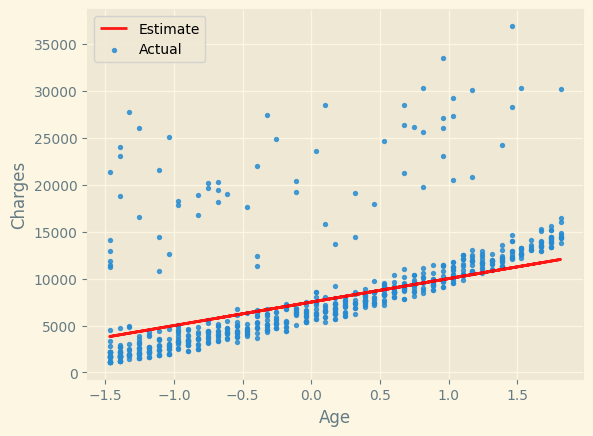

In [ ]:
try_parameters(2500, 7500, no_smoke_df) # Slope, Intercept

## Simple

In [ ]:
def linear_regression(cols, data, targets, X, y, Xtest, ytest, title) -> list[float, str, LinearRegression]:
    best_linear = [float("-inf"), "", None]  # Score, Column Name, Model

    for col in cols:
        model = LinearRegression()
        model.fit(X[[col]], y)

        score = model.score(Xtest[[col]], ytest)
        best_linear = max(best_linear, [score, col, model], key=lambda x: x[0])

        print(f"Score based on {col}: {score}")

        # Plot Line
        sns.scatterplot(data=data, x=col, y=targets, s=50, alpha=0.8, label="Data")

        # x = np.array(tf.linspace(norm_df[col].min(), norm_df[col].max(), 100)).reshape(-1, 1)
        # x_df = pd.DataFrame(x, columns=[col])  # This matches the trained model
        x_df = pd.DataFrame(data[col], columns=[col])  # This matches the trained model
        y_df = pd.DataFrame(model.predict(x_df), columns=["charges"])  # Use x_df here

        plt.suptitle(title)
        plt.plot(x_df, y_df, label="Fit", color="red")
        plt.title(f"{col} Data")
        plt.legend()
        plt.show()

    score, col, model = best_linear
    print(f"best line => w: {model.coef_}, b: {model.intercept_} for {col} with score: {score}")

Score based on age: 0.09795597430919722


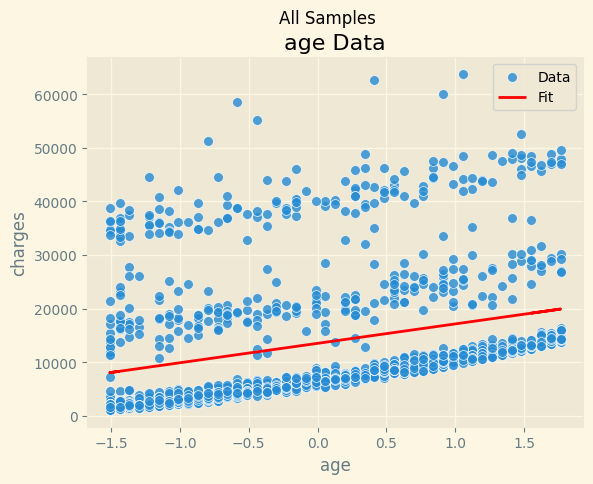

Score based on bmi: -0.03416268214552054


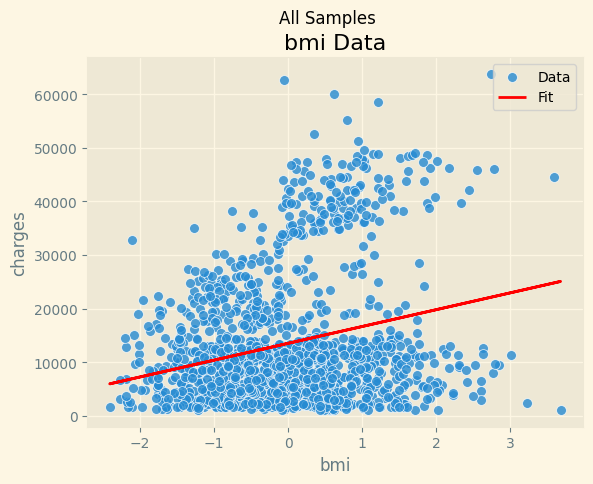

Score based on smoker: 0.5630082210314739


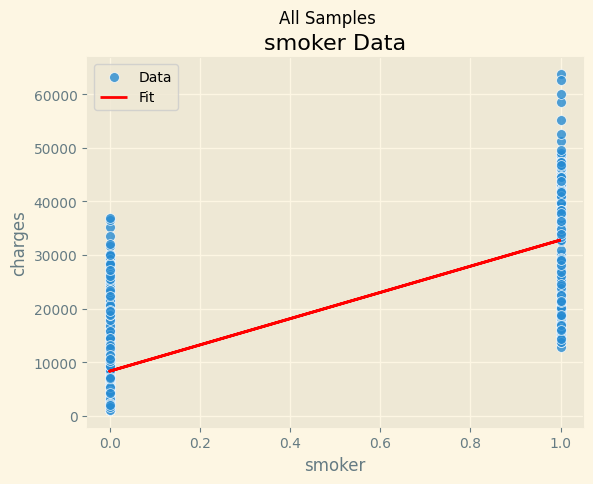

best line => w: [24459.85513994], b: 8350.46409263456 for smoker with score: 0.5630082210314739
Score based on age: 0.4154577218841916


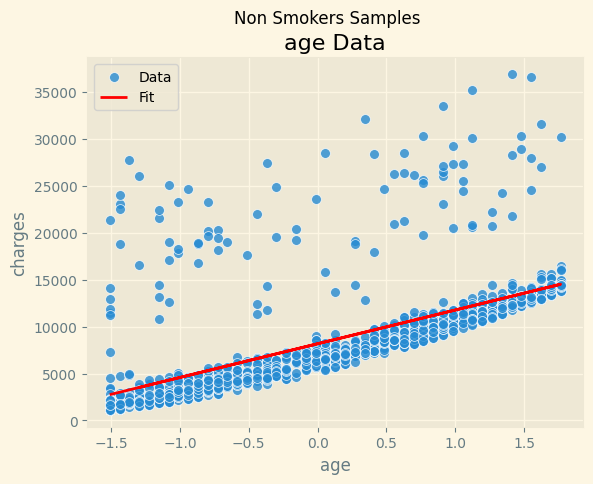

Score based on bmi: -0.0078162167785496


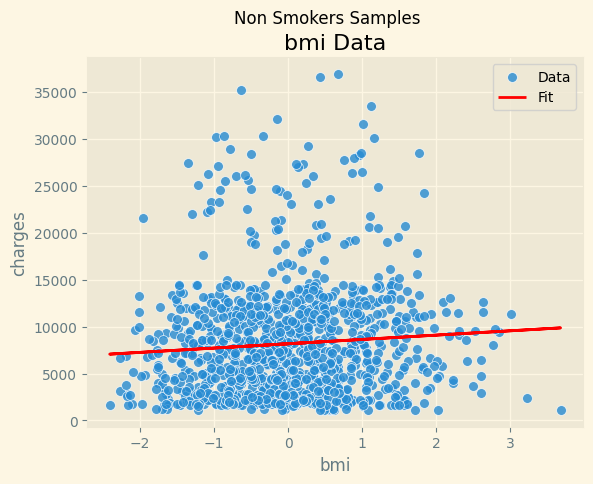

Score based on smoker: -0.01634594543742396


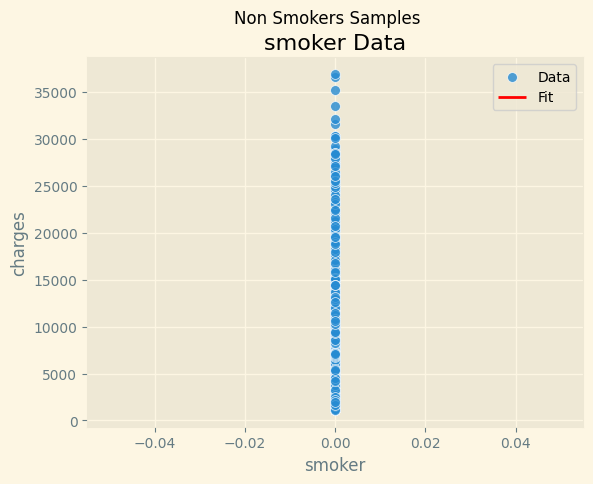

best line => w: [3590.46520452], b: 8170.182006404495 for age with score: 0.4154577218841916
Score based on age: 0.14562184701984493


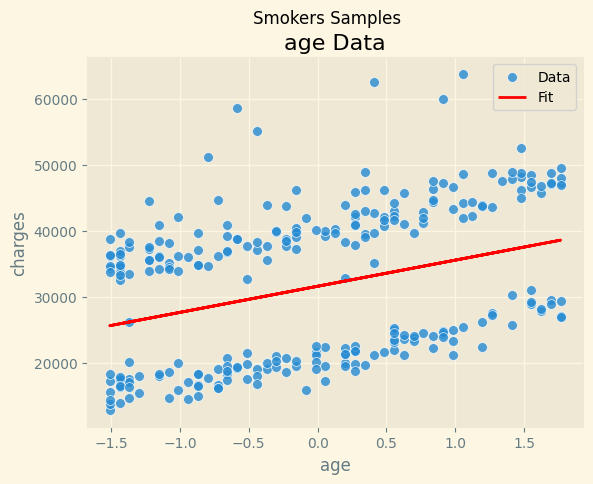

Score based on bmi: 0.6405386386307517


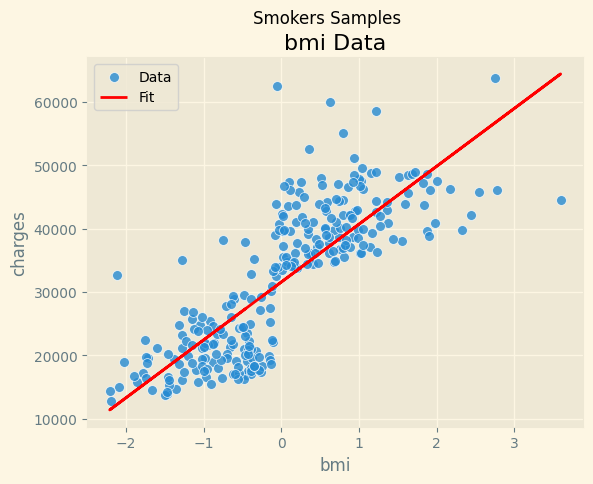

Score based on smoker: -0.014469450962067532


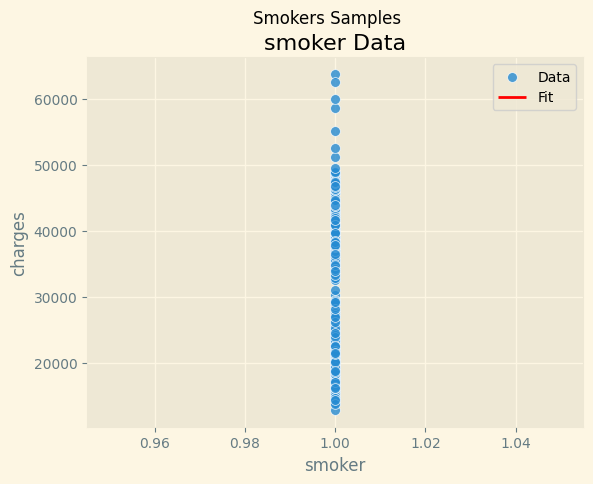

best line => w: [9136.01419791], b: 31577.754278743174 for bmi with score: 0.6405386386307517


In [ ]:
cols = ["age", "bmi", "smoker"]

linear_regression(cols, norm_df, df["charges"], X_train, y_train, X_test, y_test, "All Samples")

linear_regression(cols, norm_df[df["smoker"] == 0], df[df["smoker"] == 0]["charges"], X_train_non_s, y_train_non_s, X_test_non_s, y_test_non_s, "Non Smokers Samples")

linear_regression(cols, norm_df[df["smoker"] == 1], df[df["smoker"] == 1]["charges"], X_train_s, y_train_s, X_test_s, y_test_s, "Smokers Samples")

## Multiple

### Apply to smokers and non smokers individualy

In [ ]:
def linear_regression_mul(X, y, Xtest, ytest, title) -> list[float, str, LinearRegression]:
    best_linear = [float("-inf"), "", None]  # Score, Column Name, Model

    model = LinearRegression()
    model.fit(X, y)

    score = model.score(Xtest, ytest)
    print(f"{title} Data Score: {score}")

In [ ]:
linear_regression_mul(X_train, y_train, X_test, y_test, "All")

linear_regression_mul(X_train_non_s, y_train_non_s, X_test_non_s, y_test_non_s, "Non Smokers")

linear_regression_mul(X_train_s, y_train_s, X_test_s, y_test_s, "Smokers")

All Data Score: 0.6984461853680766
Non Smokers Data Score: 0.44382421605893085
Smokers Data Score: 0.7538812570597254


### Apply to All Columns

In [ ]:
multiple_model_all = LinearRegression()
multiple_model_all.fit(X_train, y_train)
print(multiple_model_all.score(X_test, y_test))

0.6984461853680766


In [ ]:
root_mean_squared_error(y_test, multiple_model_all.predict(X_test))

6187.312118236655

In [ ]:
mean_squared_error(y_test, multiple_model_all.predict(X_test))

38282831.24847816

In [ ]:
# Input: age, sex (male=1), bmi, children, smoker (True=1), region
input_data = np.array([[26, 1, 29, 0, 1, 2]])  # <- 2D array with one row
input_df = pd.DataFrame(data=input_data, columns=X_train.columns)

# Normalize age and bmi using the previously fitted scaler
input_df[numeric_cols] = normalization(scalar, input_df[numeric_cols])

# Make prediction
prediction = multiple_model_all.predict(input_df)
print("Prediction:", prediction)

Prediction: [28194.61759112]


### Apply to Specific Columns

In [ ]:
specific_cols = ["age", "bmi", "smoker"]
multiple_model = LinearRegression()
multiple_model.fit(X_train.loc[:, specific_cols], y_train)
print(multiple_model.score(X_test.loc[:, specific_cols], y_test))

0.6973141403550916


In [ ]:
root_mean_squared_error(y_test, multiple_model.predict(X_test.loc[:, specific_cols]))

6198.914946948454

In [ ]:
mean_squared_error(y_test, multiple_model.predict(X_test.loc[:, specific_cols]))

38426546.519500956

# **Apply Polynomial Regression**

### Simple

In [ ]:
col = "bmi"
X_train_df = pd.DataFrame(X_train, columns=[col])
X_test_df = pd.DataFrame(X_test, columns=[col])

# Create polynomial features (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train_df)
X_poly_test = poly.transform(X_test_df)

# Train linear regression on polynomial features
lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)

# Optional: get score
score = lin2.score(X_poly_test, y_test)
print(f"Polynomial Regression R² (degree=4) on '{col}': {score}")

Polynomial Regression R² (degree=4) on 'bmi': -0.044598232328566745


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



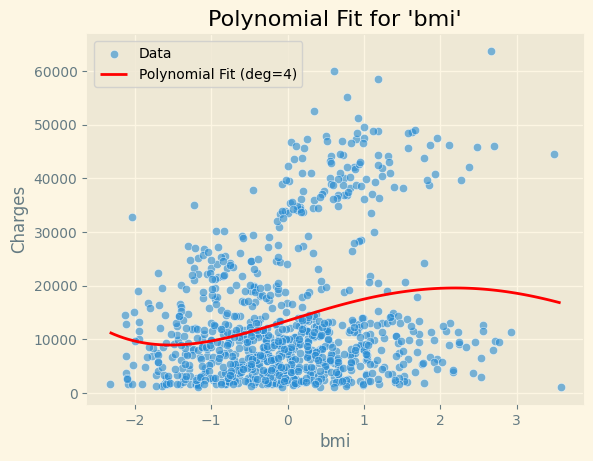

In [ ]:
# Create a smooth range of x values
x = np.linspace(X_train_df[col].min(), X_train_df[col].max(), 100).reshape(-1, 1)
x_poly = poly.transform(x)
y_poly = lin2.predict(x_poly)

# Plot
sns.scatterplot(x=X_train_df[col], y=y_train, label="Data", alpha=0.6)
plt.plot(x, y_poly, color='red', label="Polynomial Fit (deg=4)")
plt.title(f"Polynomial Fit for '{col}'")
plt.xlabel(col)
plt.ylabel("Charges")
plt.legend()
plt.show()

### Multiple

In [ ]:
X_train_df = X_train.copy()
X_test_df = X_test.copy()

# Create polynomial features (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train_df)
X_poly_test = poly.transform(X_test_df)

# Train linear regression on polynomial features
lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)

# Optional: get score
score = lin2.score(X_poly_test, y_test)
print(f"Polynomial Regression R² (degree=4): {score}")

Polynomial Regression R² (degree=4): 0.7392829792437268


# **Check Models**

## Note (Assume you didn't do normalizations)
While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column.

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [ ]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(df.drop(["charges", "region"], axis=1), df["charges"], test_size=0.33)

multiple_model_raw = LinearRegression()
multiple_model_raw.fit(X_train_raw, y_train_raw)

weights_df = pd.DataFrame({
    'feature': np.append(X_train_raw.columns, "intercept"),
    'weight': np.append(multiple_model_raw.coef_, multiple_model_raw.intercept_)
})

weights_df.sort_values(by="weight", ascending=False)

,feature,weight
4,smoker,23879.725305
3,children,549.284457
2,bmi,333.448870
0,age,267.451657
1,sex,29.872894
5,intercept,-13148.298351


## Weights after Normalization
Weights are more sense with StandardScalar than MinMaxScalar

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns, "intercept"),
    'weight': np.append(multiple_model_all.coef_, multiple_model_all.intercept_)
})

weights_df.sort_values(by="weight", ascending=False)

,feature,weight
4,smoker,24417.935921
6,intercept,7540.223221
0,age,3508.081282
2,bmi,2239.889401
3,children,583.603319
5,region,190.243487
1,sex,-216.376671


As you can see now, the most important feature are:

1. Smoker
2. Age
3. BMI

Sex weight tells that if person is a male, He is going to spend a little less charges

After normalization, the weights in a linear model no longer correspond to real-world units, so you can't directly interpret them to estimate exact charges like you can with unnormalized data.


# **Summary**

## **Machine Learning**

Congratulations, you've just trained your first _machine learning model!_ Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets.

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

We'll look at several examples of each of the above in future tutorials. Here's how the relationship between these three components can be visualized:

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

## **Keep in mind**:
### you can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm you apply.

## **Summary and Further Reading**

We've covered the following topics in this tutorial:

- A typical problem statement for machine learning
- Downloading and exploring a dataset for machine learning
- Linear regression with one variable using Scikit-learn
- Linear regression with multiple variables
- Using categorical features for machine learning
- Regression coefficients and feature importance
- Creating a training and test set for reporting results

Apply the techniques covered in this tutorial to the following datasets:

- https://www.kaggle.com/vikrishnan/boston-house-prices
- https://www.kaggle.com/sohier/calcofi
- https://www.kaggle.com/budincsevity/szeged-weather


Check out the following links to learn more about linear regression:

- https://jovian.ai/aakashns/02-linear-regression
- https://www.kaggle.com/hely333/eda-regression
- https://www.youtube.com/watch?v=kHwlB_j7Hkc

